<a href="https://colab.research.google.com/github/Rashilajayasinghe/Customer-Churn-Prediction/blob/main/ChurnPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("/content/drive/MyDrive/CW_ML/WA_Fn-UseC_-Telco-Customer-Churn.csv")

 Understanding the Dataset

In [6]:
data.shape

(7043, 21)

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Drop the CustomerID column

In [10]:
data.drop(columns=['customerID'], inplace=True)

Handling Missing values and Data Transformation

Convert "TotalCharges" to float

In [11]:
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()]



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
data2=data[data.TotalCharges != ' ']
data2.shape

(7032, 20)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
data2.TotalCharges = pd.to_numeric(data2.TotalCharges)

/tmp/ipython-input-337948188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.TotalCharges = pd.to_numeric(data2.TotalCharges)


Count Churn Occurrences(YES/NO)


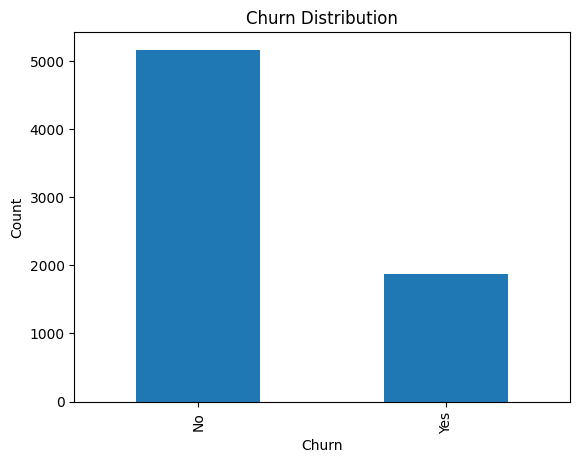

In [15]:
data2['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

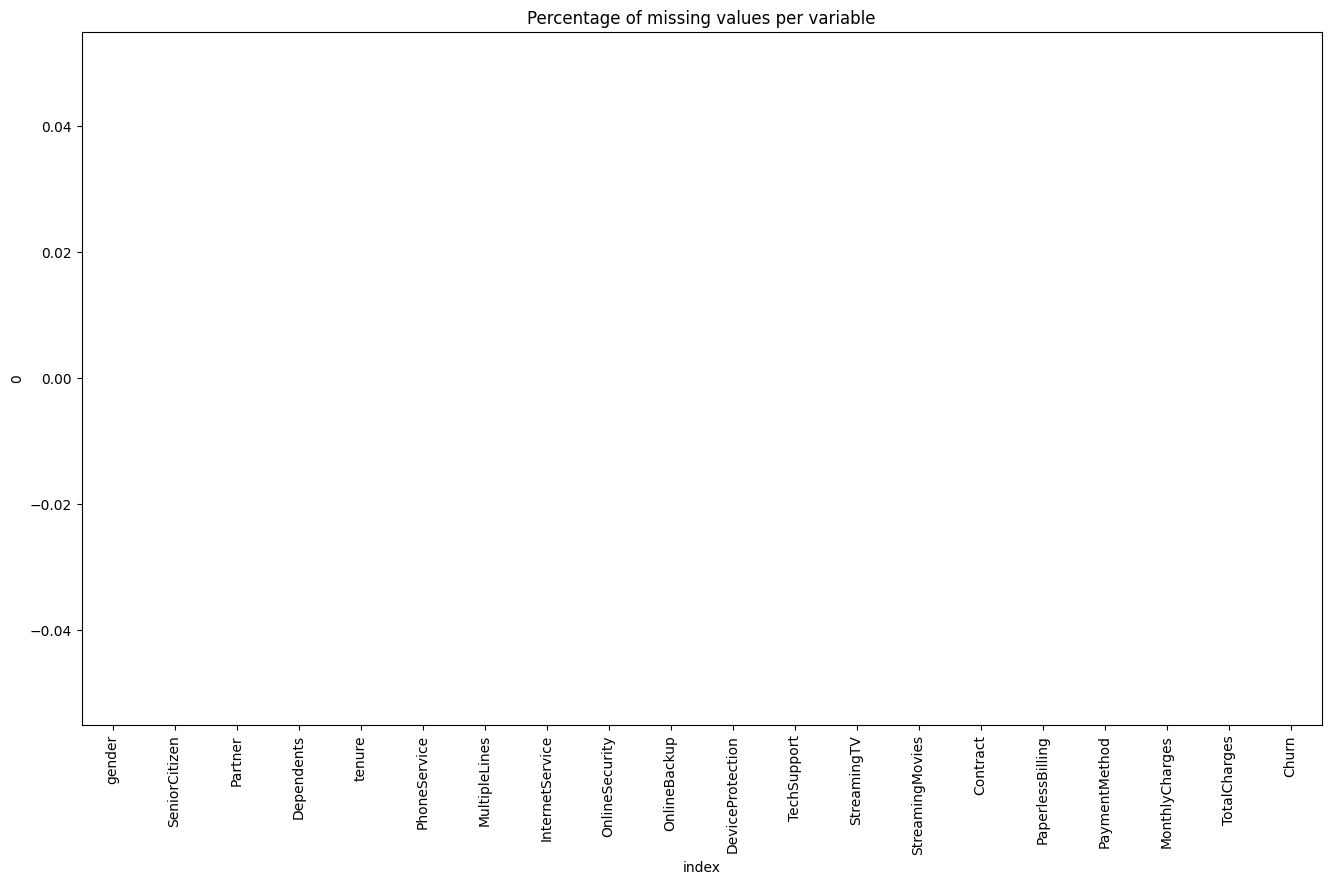

In [16]:
#create a dataframe with the percentage of missing values
missing= pd.DataFrame ((data.isnull().sum()) * 100 / data.shape[0]).reset_index()

import seaborn as sns
plt.figure(figsize=(16,9))
ax = sns.barplot(data=missing, x='index', y=0)

plt.xticks(rotation = 90)
plt.title('Percentage of missing values per variable')
plt.show()

Visualization and Variate Analysis

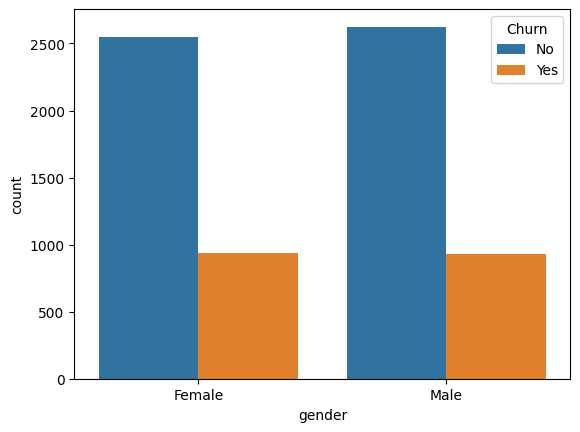

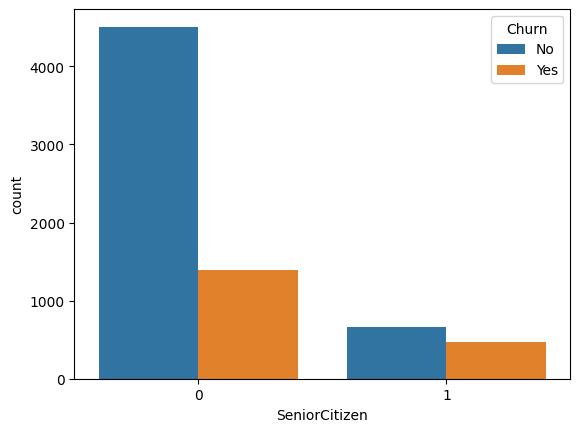

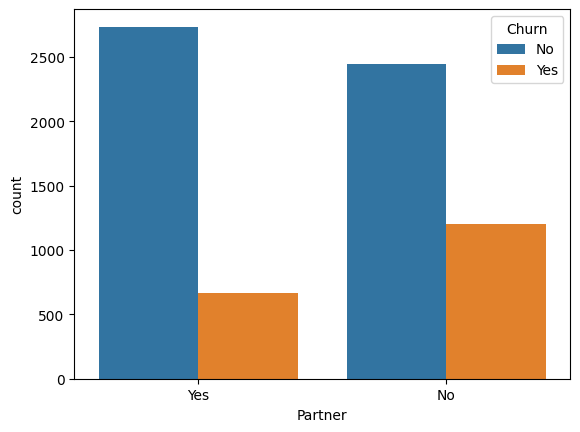

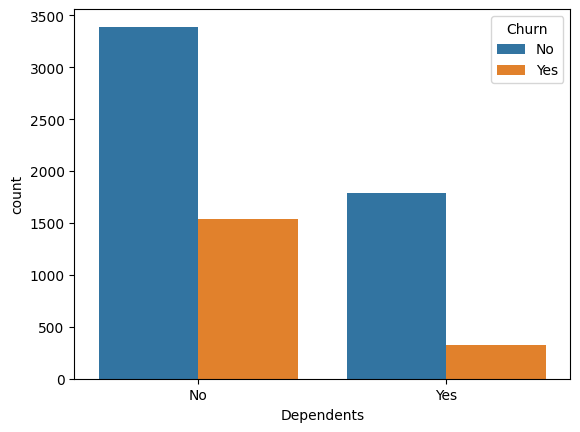

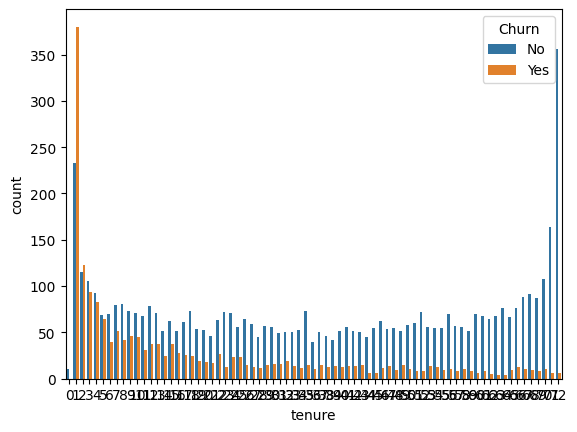

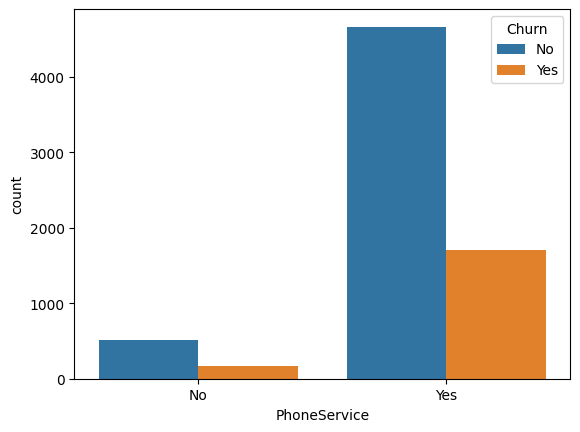

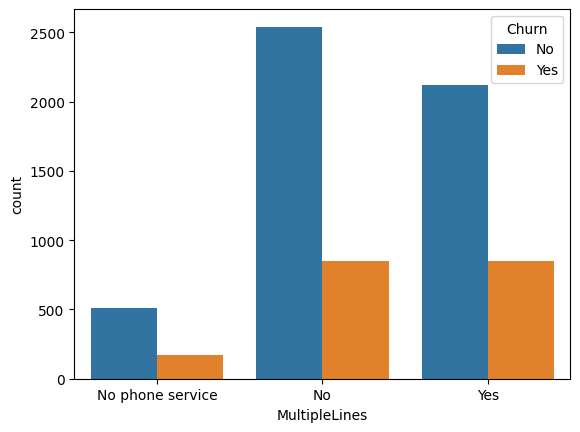

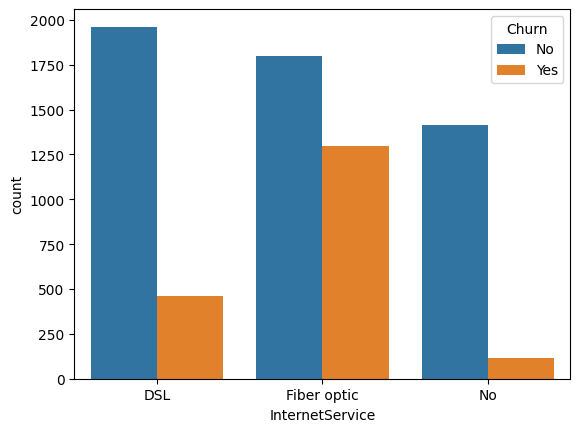

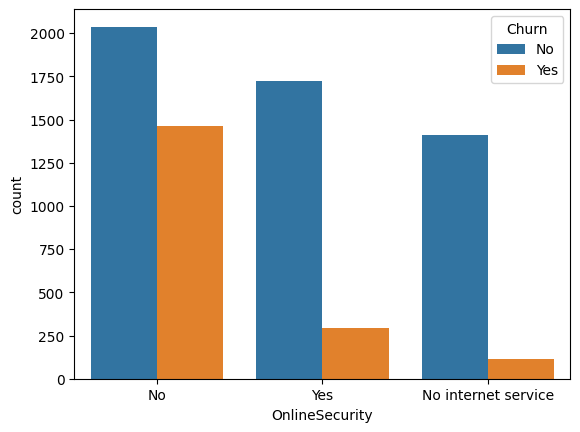

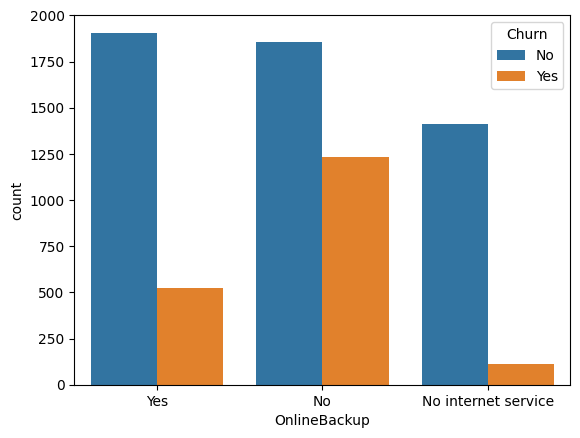

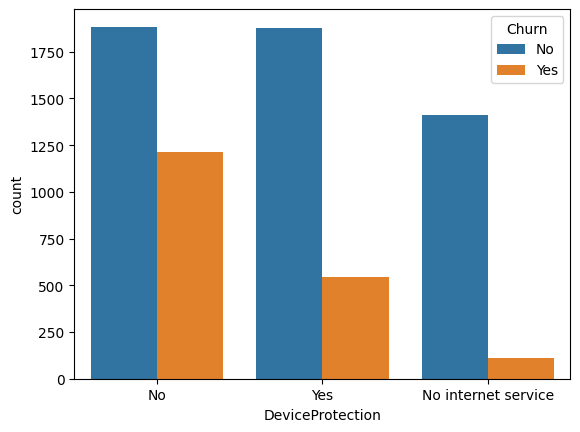

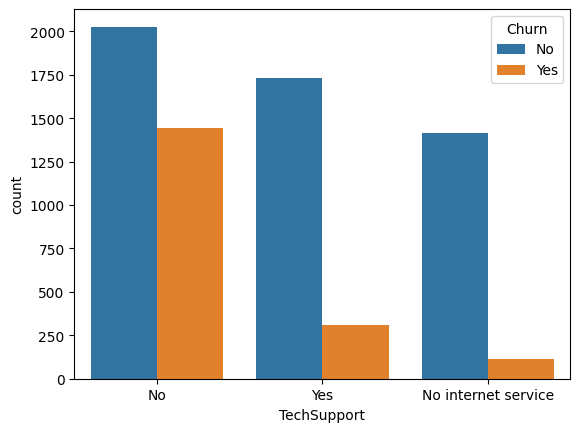

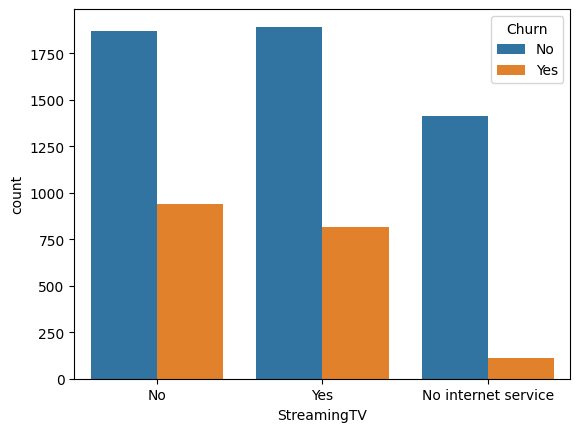

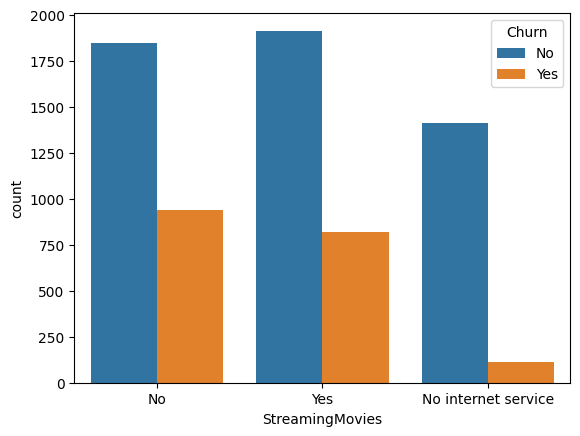

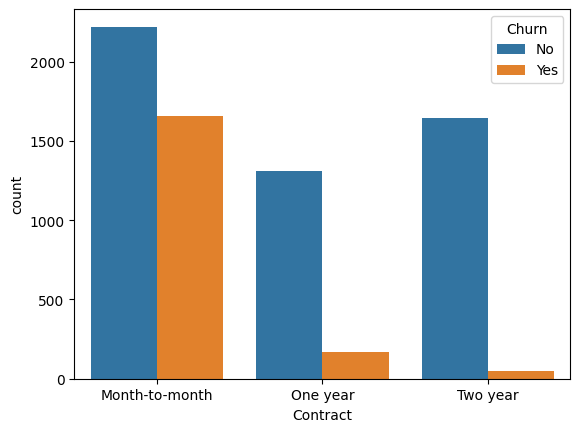

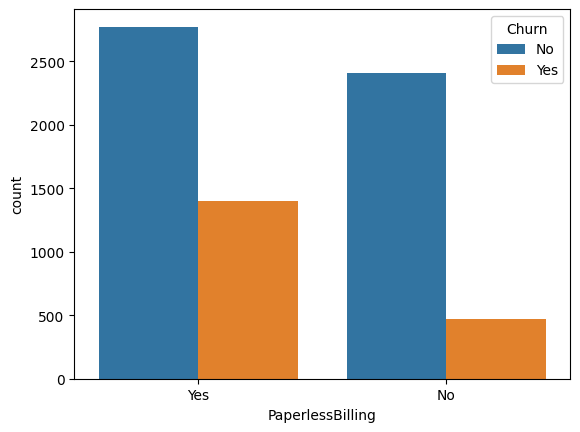

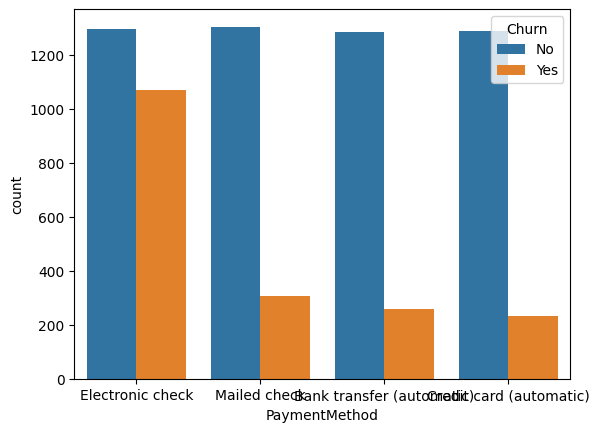

In [17]:
for i,predictor in enumerate(data.drop(columns=['Churn' ,'TotalCharges' , 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=data, x=predictor, hue='Churn')
#

ValueError: could not convert string to float: ' '

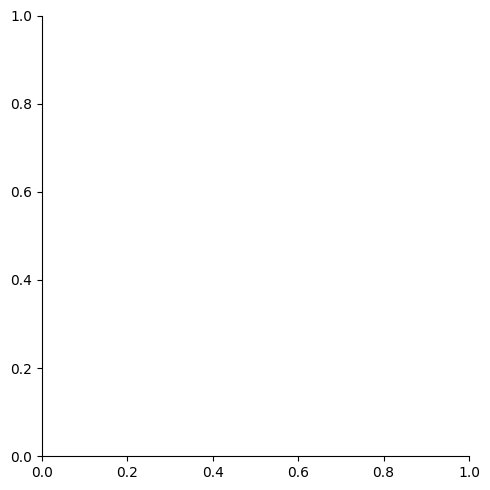

In [18]:
import seaborn as sns
#visualize the relationship between MonthlyCharges and TotalCharges
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=data, line_kws={'color': 'red'})
plt.title('MonthlyCharges vs. TotalCharges')
plt.show()

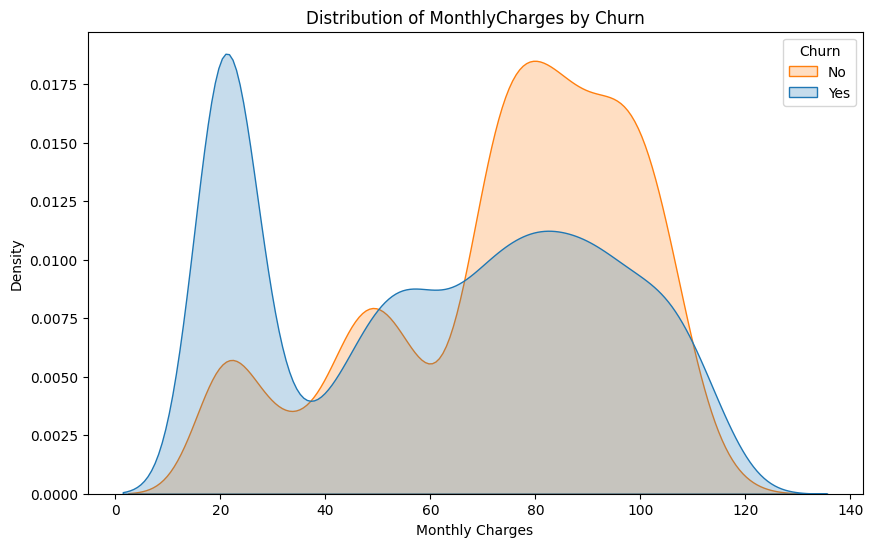

In [19]:
#kdeplot to compare the distribution of MonthlyCharges between churned (1) and non-churned (0)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Distribution of MonthlyCharges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

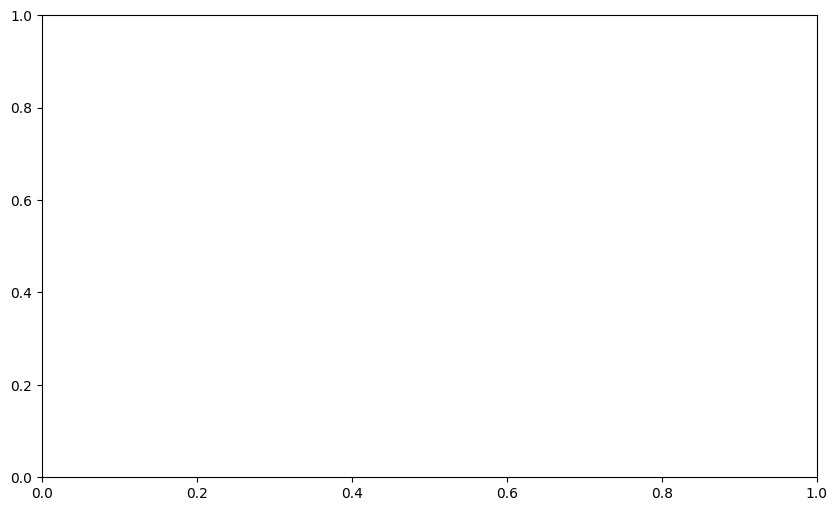

In [20]:
#kdeplot to compare the distribution of TotalCharges between churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Feature Engineering and selection

In [21]:
print(data['tenure'].max())

72


In [24]:
def print_unique_col_values(data2):
       for column in data2:
            if data2[column].dtypes=='object':
                print(f'{column}: {data2[column].unique()}')

In [25]:
print_unique_col_values(data2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
#replace the "No internet service" , "No phone service" as No
data2.replace('No internet service','No',inplace=True)
data2.replace('No phone service','No',inplace=True)

/tmp/ipython-input-2117834313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace('No internet service','No',inplace=True)
/tmp/ipython-input-2117834313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace('No phone service','No',inplace=True)


In [27]:
print_unique_col_values(data2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_columns:
    data2[col].replace({'Yes': 1,'No': 0},inplace=True)

/tmp/ipython-input-4235501260.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2[col].replace({'Yes': 1,'No': 0},inplace=True)
/tmp/ipython-input-4235501260.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2[col].replace({'Yes': 1,'No': 0},inplace=True)
/tmp/ipython-input-4235501260.py

In [29]:
data2['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipython-input-2567335167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-input-2567335167.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-inp

In [34]:
for col in data2:
    print(f'{col}: {data2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


**Preparation for Modeling (Encoding and Correlation)**

In [35]:
data2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data2['Churn'].replace(to_replace='No',  value=0, inplace=True)

print(data2['Churn'].head())
print(data2['Churn'].dtype)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
int64


/tmp/ipython-input-3150075582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipython-input-3150075582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipython-input-3150075582.py:2: FutureWarning: A 

In [38]:
Telco_data_dummies = pd.get_dummies(data = data2, columns=['InternetService','Contract','PaymentMethod'])
Telco_data_dummies.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
Telco_data_dummies.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1309,1,0,0,0,18,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
349,1,1,1,0,64,1,0,1,1,1,...,False,True,False,False,True,False,True,False,False,False
4373,1,0,1,1,25,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
5772,0,0,1,1,69,1,1,0,1,1,...,True,False,False,False,False,True,True,False,False,False
5847,1,0,0,0,62,1,1,0,0,0,...,False,True,False,False,True,False,True,False,False,False


In [40]:
for col in ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
            'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']:
    Telco_data_dummies[col] = Telco_data_dummies[col].astype(int)

print(Telco_data_dummies.sample(5))

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
944        1              0        1           1      54             1   
229        1              0        1           1      47             1   
1905       1              0        0           0      41             1   
6535       0              0        0           0      35             1   
2216       1              1        0           0      64             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
944               1               1             1                 0  ...   
229               1               1             1                 0  ...   
1905              1               0             0                 0  ...   
6535              0               0             1                 1  ...   
2216              1               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
944                 

In [41]:
Telco_data_dummies.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [44]:
Telco_data_dummies.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
86,1,0,1,0,35,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
5435,1,0,1,1,46,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
955,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
387,1,0,0,0,42,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
4694,0,0,1,1,13,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


**Visualize Feature Correlation**

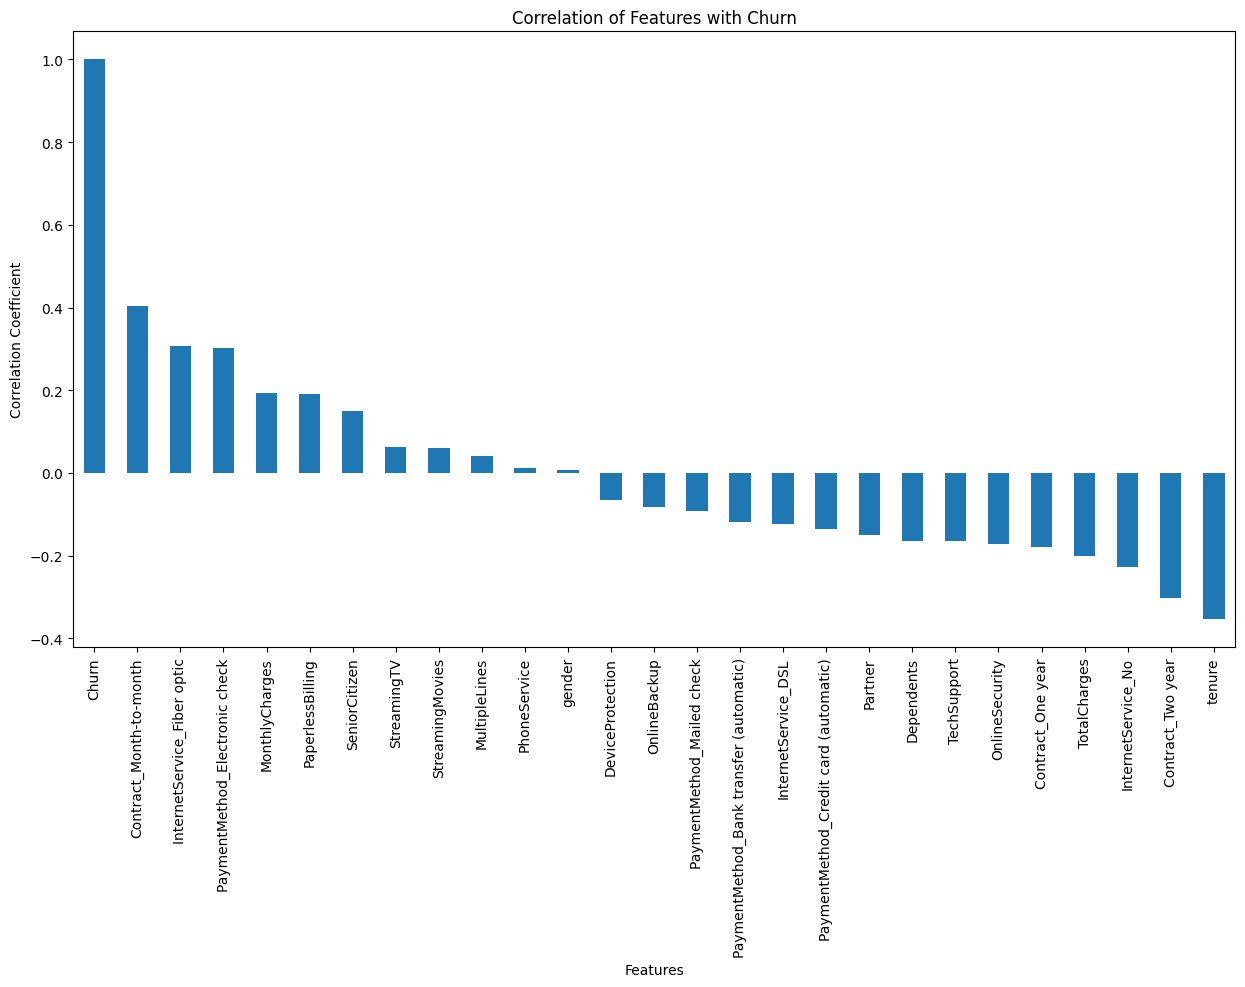

In [42]:
plt.figure(figsize=(15,8))
Telco_data_dummies.corr(numeric_only=True)['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

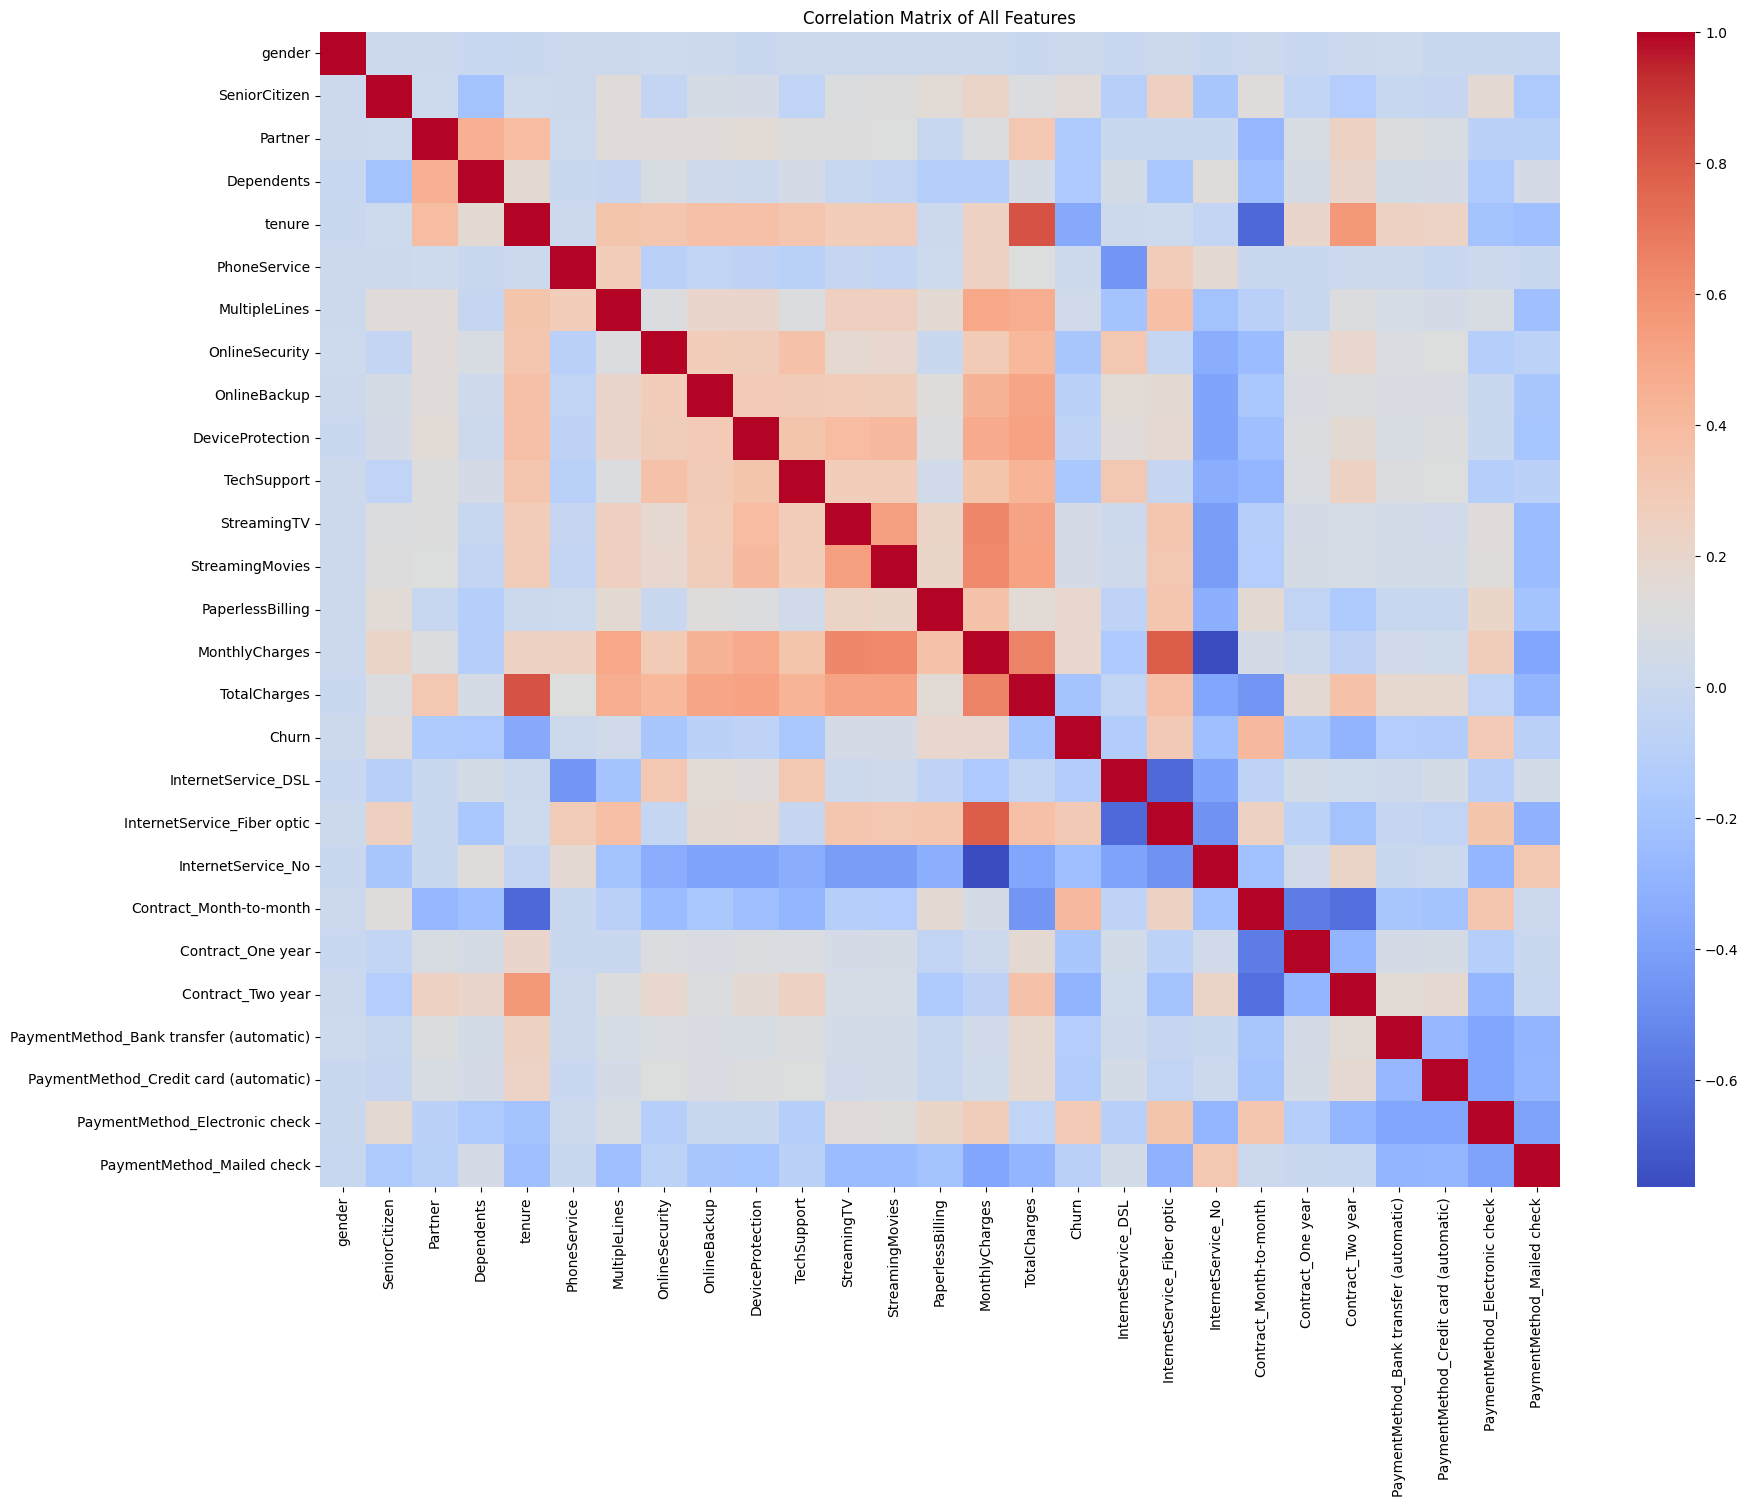

In [43]:
correlation_matrix = Telco_data_dummies.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

In [45]:
Telco_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [46]:
Telco_data_dummies.to_csv('Telco.csv', index=False)
print("Processed data saved to Telco.csv")

Processed data saved to Telco.csv
